In [350]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [351]:
# Loading the Boston house pricing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [352]:
housing.values()

dict_values([array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), None, ['MedHouseVal'], ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:*

In [353]:
# Checking the description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [354]:
housing.target_names

['MedHouseVal']

In [355]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [356]:
housing_df = pd.DataFrame(housing.data,columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [357]:
housing_df['MedHouseVal'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [358]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [359]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [360]:
# checking the missing values

housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [361]:
# EDA - exploratory data analysis
# correlation - Finding how much independent variables were correlated to target variable
# check whether the independent variables were highly correlated to avoid multicollinearity.
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [362]:
# import seaborn as sns
# sns.pairplot(housing_df)

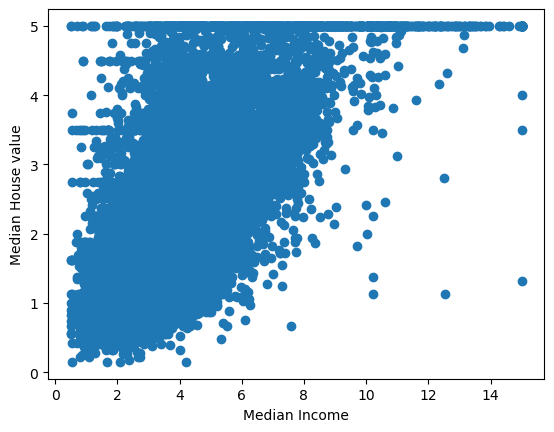

In [363]:
plt.scatter(housing_df['MedInc'],housing_df['MedHouseVal'])
plt.xlabel('Median Income')
plt.ylabel('Median House value')
plt.show()

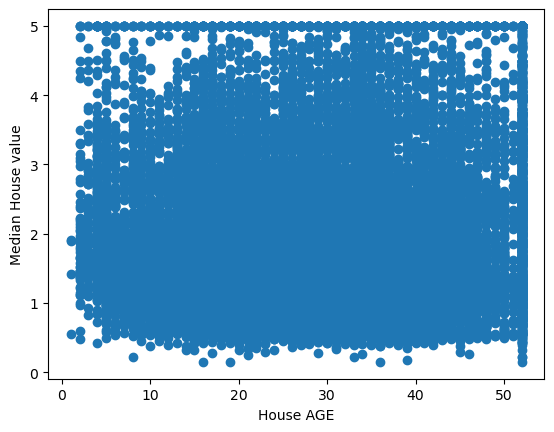

In [364]:
plt.scatter(housing_df['HouseAge'],housing_df['MedHouseVal'])
plt.xlabel('House AGE')
plt.ylabel('Median House value')
plt.show()

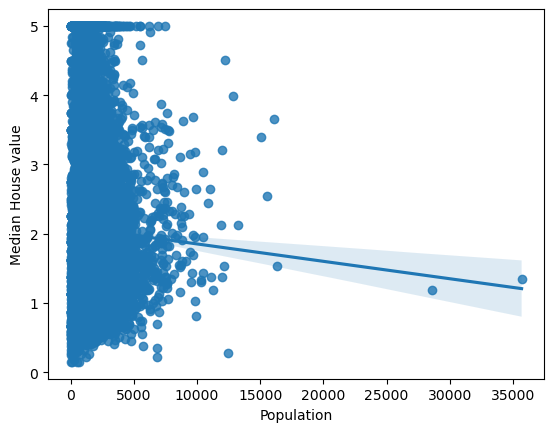

In [365]:
# Regression plot
import seaborn as sns
sns.regplot(x='Population',y='MedHouseVal',data=housing_df)
plt.xlabel('Population')
plt.ylabel('Median House value')
plt.show()

In [431]:
# separating the Independent and dependent features

x=housing_df.iloc[:,:-1] # taking all rows except last column data
y=housing_df.iloc[:,-1] # taking all rows of last column data
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [433]:
# Train Test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [435]:
x_train.shape

(14448, 8)

In [437]:
x_test.shape

(6192, 8)

In [439]:
x_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [441]:
# Standardizing the dataset
# Create a preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_train.columns),
        #('text', CountVectorizer(), 'Description')
    ]
)

In [443]:
# creating pipeline for standardisng the data and modeling the data
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Algorithms=[
    LinearRegression(),
    Ridge(),
Lasso(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
AdaBoostRegressor(),
KNeighborsRegressor()
]
evaluations={}
def evaluate_pipeline(preprocessor,algorithms:list):
    for algo in algorithms:
        model = make_pipeline(preprocessor,algo)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error on Test Data: {mse} for model: {str(algo)}')
        score=r2_score(y_test,y_pred)
        R_squared = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
        print(f'adjusted_R_Square : {R_squared}')
        print('='*30)
        evaluations[algo] = R_squared
    return max(evaluations.items(),key=lambda x:x[1])[0]

print(f'The model which is having high R-square is: {evaluate_pipeline(preprocessor,Algorithms)}')



Mean Squared Error on Test Data: 0.5305677824766752 for model: LinearRegression()
adjusted_R_Square : 0.5952472117200027
Mean Squared Error on Test Data: 0.5305437338152265 for model: Ridge()
adjusted_R_Square : 0.5952655576563699
Mean Squared Error on Test Data: 1.3125452673724591 for model: Lasso()
adjusted_R_Square : -0.0012978063478110702
Mean Squared Error on Test Data: 0.5266708825526485 for model: DecisionTreeRegressor()
adjusted_R_Square : 0.598220029071511
Mean Squared Error on Test Data: 0.2556189667757397 for model: RandomForestRegressor()
adjusted_R_Square : 0.8049966602631379
Mean Squared Error on Test Data: 0.28829120669272745 for model: GradientBoostingRegressor()
adjusted_R_Square : 0.7800720782539858
Mean Squared Error on Test Data: 0.648410703530015 for model: AdaBoostRegressor()
adjusted_R_Square : 0.5053487059103408
Mean Squared Error on Test Data: 0.42949402014873317 for model: KNeighborsRegressor()
adjusted_R_Square : 0.6723530754292881
{LinearRegression(): 0.5952

* | Linear Regression | from sklearn.linear_model import LinearRegression | 
* | Ridge Regression | from sklearn.linear_model import Ridge | 
* | Lasso Regression | from sklearn.linear_model import Lasso | 
* | ElasticNet | from sklearn.linear_model import ElasticNet | 
* | SGD Regressor | from sklearn.linear_model import SGDRegressor | 
* | Bayesian Ridge | from sklearn.linear_model import BayesianRidge | 
* | Decision Tree Regressor | from sklearn.tree import DecisionTreeRegressor | 
* | Random Forest Regressor | from sklearn.ensemble import RandomForestRegressor | 
* | Gradient Boosting Regressor | from sklearn.ensemble import GradientBoostingRegressor | 
* | AdaBoost Regressor | from sklearn.ensemble import AdaBoostRegressor | 
* | Bagging Regressor | from sklearn.ensemble import BaggingRegressor | 
* | Voting Regressor | from sklearn.ensemble import VotingRegressor | 
* | K-Nearest Neighbors | from sklearn.neighbors import KNeighborsRegressor | 
* | Support Vector Regressor (SVR) | from sklearn.svm import SVR | 
* | Gaussian Process Regressor | from sklearn.gaussian_process import GaussianProcessRegressor | 
* | Kernel Ridge | from sklearn.kernel_ridge import KernelRidge | 
* | Quantile Regressor | from sklearn.linear_model import QuantileRegressor | 

In [445]:
# retraining the data with best fit model to make predictions
model = RandomForestRegressor()
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test = scaller.transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [446]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

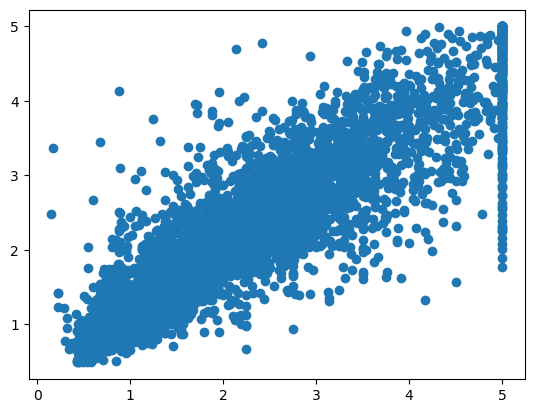

In [447]:
plt.scatter(y_test,y_pred)
plt.show()

The predicted data should be linear, then only we can say our model performed well.

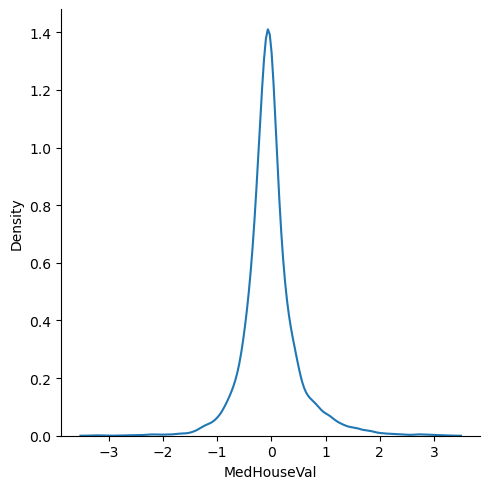

In [449]:
# calculating the residuals which means error

residuals = y_test-y_pred

#plotting the residuals
import seaborn as sns
sns.displot(residuals,kind="kde")
plt.show()

So from above plot we could see our model is performing the normal distribution values as output,

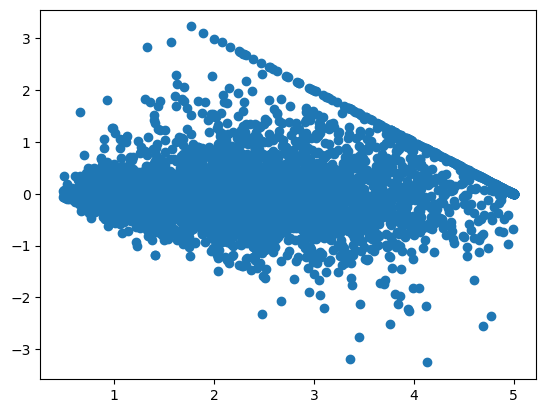

In [451]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
plt.show()

from above plot we colud see the data points were uniformly distributed which also indicates the model is predicting good data

Below is the sample graph for uniform distribution

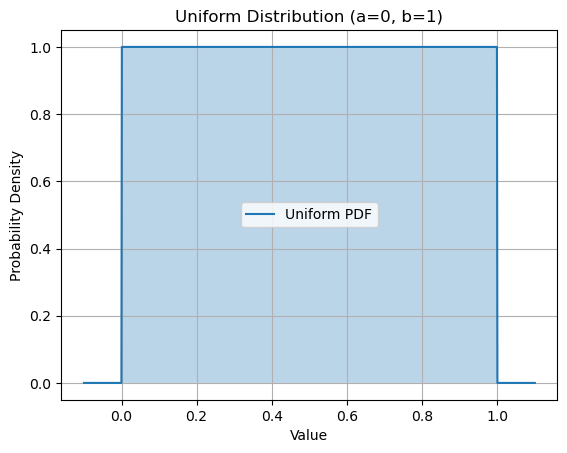

In [454]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

a, b = 0, 1  # Range
x = np.linspace(a - 0.1, b + 0.1, 1000)
y = uniform.pdf(x, loc=a, scale=b - a)

plt.plot(x, y, label='Uniform PDF')
plt.fill_between(x, y, alpha=0.3)
plt.title("Uniform Distribution (a=0, b=1)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()


R Square and adjusted R Square

In [458]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8073835034156471


In [460]:
# display the adjusted R- squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8071342826534484

#### New Data Prediction

In [464]:
housing.data[0].shape

(8,)

In [469]:
# need to reshape the data to 1 row , 8 columns data. from above it was in 8 rows and 1 column
s = housing.data[0].reshape(1,-1)

In [471]:
s.shape

(1, 8)

In [473]:
model.predict(scaller.transform(s))

D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.2202527])

#### Pickle the model file for deployment

In [475]:
import pickle
pickle.dump(model,open('regmodel.pkl','wb'))

In [477]:
# loading back the pickle file

pickle_model = pickle.load(open('regmodel.pkl','rb'))
pickle_model.predict(scaller.transform(s))

D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.2202527])